In [1]:
import tensorflow as tf


print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2024-11-19 16:16:25.499218: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-19 16:16:25.778232: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
/home/asko/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Num GPUs Available:  1


2024-11-19 16:16:27.620406: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-11-19 16:16:27.778828: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-11-19 16:16:27.779203: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [2]:
import tensorflow as tf

USE_GPU = True

if USE_GPU and tf.config.list_physical_devices('GPU'):
    device = 'GPU'
    print("Using GPU")
else:
    device = 'CPU'
    print("Using CPU")

Using GPU


In [3]:
import tensorflow_datasets as tfds

# Load the ImageNet dataset

data_dir = '/home/asko/tensorflow_datasets/downloads/manual'

# Load the ImageNet Resized dataset (e.g., 32x32)
dataset, info = tfds.load('imagenet_resized/64x64', data_dir=data_dir, with_info=True, as_supervised=True)

# Split the dataset into training and validation sets
train_dataset = dataset['train']
val_dataset = dataset['validation']

# Print the dataset info
print(info)

/home/asko/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


tfds.core.DatasetInfo(
    name='imagenet_resized',
    full_name='imagenet_resized/64x64/0.1.0',
    description="""
    This dataset consists of the ImageNet dataset resized to fixed size. The images
    here are the ones provided by Chrabaszcz et. al. using the box resize method.
    
    For [downsampled ImageNet](http://image-net.org/download.php) for unsupervised
    learning see `downsampled_imagenet`.
    
    those from the other ImageNet datasets provided by Tensorflow datasets. See the
    original
    [label list](https://github.com/PatrykChrabaszcz/Imagenet32_Scripts/blob/master/map_clsloc.txt),
    and the
    [labels used by this dataset](https://github.com/tensorflow/datasets/blob/master/tensorflow_datasets/image_classification/imagenet_resized_labels.txt).
    Additionally, the original authors 1 index there labels which we convert to 0
    indexed by subtracting one.
    """,
    config_description="""
    Images resized to 64x64
    """,
    homepage='https://patrykc

2024-11-15 18:48:19.540097: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-15 18:48:19.541578: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-11-15 18:48:19.541893: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-11-15 18:48:19.542032: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), bu

In [ ]:
# from keras.applications import VGG16
from VGG16.vgg import VGG
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

alpha = 0.03
temperature = 0.02

# Load the VGG16 model
# model = VGG(alpha=alpha, temperature=temperature, num_of_classes=10)


In [6]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.applications.vgg16 import preprocess_input

data_dir = '/home/asko/tensorflow_datasets/downloads/manual'
dataset, info = tfds.load('imagenet_resized/64x64', data_dir=data_dir, with_info=True, as_supervised=True)

train_dataset = dataset['train']
val_dataset = dataset['validation']


def preprocess(image, label):
    image = tf.image.resize(image, [64, 64])
    image = preprocess_input(image) 
    return image, label

batch_size = 32
train_dataset = (train_dataset
                 .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
                 .shuffle(1000)  
                 .batch(batch_size)
                 .prefetch(tf.data.AUTOTUNE))

val_dataset = (val_dataset
               .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
               .batch(batch_size)
               .prefetch(tf.data.AUTOTUNE))

In [12]:
import tarfile

# Path to the downloaded tgz file
tgz_path = "/home/asko/Documents/workspace/Fall-24/682/project/dataset/imagenette2.tgz"
extract_path = "./imagenette"  # Target folder for extraction

# Extract the file
with tarfile.open(tgz_path, "r:gz") as tar:
    tar.extractall(path=extract_path)
print("Extraction completed.")

Extraction completed.


In [11]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import random
# data_dir = '/Users/apple/Documents/MSCS/Fall 2024/CS682/Project/cs682-knowledge-distillation/imagenette2-320.tgz'

transform = transforms.Compose([
    transforms.Resize((224,224)),  # Resize images to a size suitable for VGG16
    # transforms.CenterCrop(224),  # Crop to the expected input size for VGG16
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize as per VGG16
])
extract_path_train = "./imagenette/imagenette2/train"
train_dataset = datasets.ImageFolder(
    root=extract_path_train,  # Imagenette URL
    transform=transform
)
extract_path_val = "./imagenette/imagenette2/val"
val_dataset = datasets.ImageFolder(
    root=extract_path_val,  # Imagenette URL
    transform=transform
)

batch_size = 16
sampler_train = sampler.SubsetRandomSampler(range(len(train_dataset)))
train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=sampler_train)

batch_size = 16
sampler_val = sampler.SubsetRandomSampler(range(1000))
val_loader = DataLoader(val_dataset, batch_size=batch_size, sampler=sampler_val)

batch_size = 32
sampler_test = sampler.SubsetRandomSampler(range(1000, len(val_dataset)))
test_loader = DataLoader(val_dataset, batch_size=batch_size, sampler=sampler_test)

# for i, (images, labels) in enumerate(test_loader):
#     print(images.shape)

In [35]:
print(test_loader)

In [3]:
import torch

torch.cuda.set_per_process_memory_fraction(0.95, device=0)  # Reserve up to 95% of memory for your process
# torch.cuda.set(128) 

['n01440764', 'n02102040', 'n02979186', 'n03000684', 'n03028079', 'n03394916', 'n03417042', 'n03425413', 'n03445777', 'n03888257']


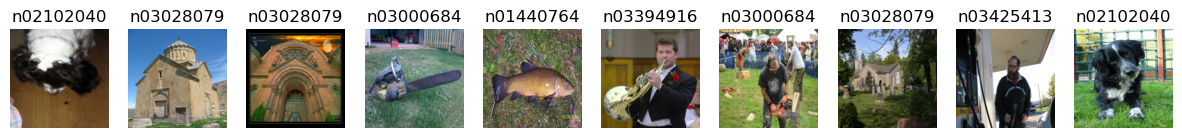

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display a batch of images
def show_images(images, labels, classes, num_images=10):
    """
    Displays a batch of images with their corresponding labels.
    
    :param images: Tensor of shape (batch_size, C, H, W)
    :param labels: Tensor of shape (batch_size,)
    :param classes: List of class names
    :param num_images: Number of images to display (default is 10)
    """
    images = images[:num_images]  # Select only the first 'num_images'
    labels = labels[:num_images]
    images = images.numpy().transpose((0, 2, 3, 1))  # Convert to HWC format

    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        ax = axes[i]
        img = images[i]
        img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])  # Un-normalize
        img = np.clip(img, 0, 1)  # Clip values to [0, 1]
        ax.imshow(img)
        ax.set_title(classes[labels[i]])
        ax.axis('off')
    plt.show()

# Get a batch of data from the DataLoader
classes = train_dataset.classes  # Class names from the dataset
data_iter = iter(train_loader)
images, labels = next(data_iter)
print(classes)
# Plot the images
show_images(images, labels, classes)


In [12]:
for images, labels in train_loader:
    print(f"Batch of images shape: {images.shape}")  # Shape: [batch_size, 3, 64, 64]
    print(images)
    print(f"Batch of labels shape: {labels.shape}")  # Shape: [batch_size]
    print(labels)
    break

Batch of images shape: torch.Size([50, 3, 227, 227])
tensor([[[[-0.4568,  0.1083,  0.5878,  ..., -0.5767, -0.3541, -0.2684],
          [-0.5767,  0.0912, -0.1486,  ..., -0.5082, -0.3541, -0.3369],
          [-0.5767, -0.2342, -0.0801,  ..., -0.6623, -0.4226, -0.4739],
          ...,
          [-0.8335, -0.7137, -0.5253,  ..., -1.3644, -1.4672, -1.5185],
          [-0.7137, -0.6623, -0.5082,  ..., -1.2445, -1.1760, -1.2445],
          [-0.7137, -0.6623, -0.5938,  ..., -1.2959, -1.3130, -1.3302]],

         [[ 0.2402,  0.8529,  1.4132,  ...,  0.0651,  0.3102,  0.4153],
          [ 0.1176,  0.8354,  0.6604,  ...,  0.1352,  0.3277,  0.3627],
          [ 0.1176,  0.5203,  0.7304,  ...,  0.0126,  0.2752,  0.2227],
          ...,
          [-0.7052, -0.6352, -0.4776,  ..., -0.9153, -1.0728, -1.1954],
          [-0.5476, -0.5301, -0.4251,  ..., -0.7577, -0.7752, -0.9328],
          [-0.5301, -0.5126, -0.4951,  ..., -0.7927, -0.9153, -1.0378]],

         [[ 0.3393,  0.9668,  1.5420,  ...,  0.16

In [7]:
import tensorflow as tf
from VGG16.vgg import VGG

alpha = 0.03
temperature = 0.02

# Load the VGG16 model
model = VGG(alpha=alpha, temperature=temperature, num_of_classes=10)

device = 'cuda' if len(tf.config.list_physical_devices('GPU'))!=0 else 'cpu'
model.to(device)
print(device)

cuda


In [5]:
def check_accuracy_part34(loader, model):
    print('Checking accuracy on validation set')   
    num_correct = 0
    num_samples = 0
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device, dtype=torch.float32)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            _, preds = scores.max(1)
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
        acc = float(num_correct) / num_samples
        print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))


In [20]:
import torch.nn as nn

class VGG_NET(nn.Module):
    def __init__(self, num_of_classes):
        super(VGG_NET, self).__init__()
        
        self.network = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=(3,3), stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3,3), stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2), stride=(2,2)),
            
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3,3), stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3,3), stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2), stride=(2,2)),
            
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(3,3), stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(3,3), stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(3,3), stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2), stride=(2,2)),
            
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=(3,3), stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3,3), stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3,3), stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2), stride=(2,2)),
            
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3,3), stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3,3), stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3,3), stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2), stride=(2,2)),
            
            nn.Flatten(),
            nn.Linear(25088, 4096),
            nn.BatchNorm1d(4096),
            nn.ReLU(),
            nn.Linear(4096, 4096),
            nn.BatchNorm1d(4096),
            nn.ReLU(),
            nn.Linear(4096, num_of_classes)
        )
    
    def forward(self, x):
        return self.network(x)

In [17]:
import tensorflow as tf

alpha = 0.03
temperature = 0.02

# Load the VGG16 model
model = VGG_NET(num_of_classes=10)

device = 'cuda' if len(tf.config.list_physical_devices('GPU'))!=0 else 'cpu'
model.to(device)
print(device)

cuda


In [9]:
torch.cuda.empty_cache()


In [10]:
def check_accuracy_part35(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()  # Set model to evaluation mode
    print(device)
    
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device, dtype=torch.float32)  # Move inputs to device
            y = y.to(device=device, dtype=torch.long)  # Move labels to device, long for classification
            
            scores = model(x)  # Get model predictions
            _, preds = scores.max(1)  # Get predicted class indices
            
            num_correct += preds.eq(y).sum().item()  # Compare predictions with ground truth
            num_samples += preds.size(0)  # Count samples

        acc = float(num_correct) / num_samples
        return 100 * acc


In [48]:
import torch.nn.functional as F
def train_part34(model, optimizer, epochs=1):
    """
    Train a model on CIFAR-10 using the PyTorch Module API.
    
    Inputs:
    - model: A PyTorch Module giving the model to train.
    - optimizer: An Optimizer object we will use to train the model
    - epochs: (Optional) A Python integer giving the number of epochs to train for
    
    Returns: Nothing, but prints model accuracies during training.
    """
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    for e in range(epochs):
        for t, (x, y) in enumerate(train_loader):
            model.train()  # put model to training mode
            x = x.to(device=device)  # move to device, e.g. GPU
            y = y.to(device=device)
            
            scores = model(x)
            loss = F.cross_entropy(scores, y)

            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()

            # This is the backwards pass: compute the gradient of the loss with
            # respect to each  parameter of the model.
            loss.backward()

            # Actually update the parameters of the model using the gradients
            # computed by the backwards pass.
            optimizer.step()
            if t % 100 == 0:
                print('Iteration %d, loss = %.4f' % (t, loss.item()))
                # check_accuracy_part34(loader_val, model)
                print()

In [10]:
import torch.optim as optim
import torch
import torch.nn.functional as F

optimizer = optim.Adam(model.parameters(), lr=0.01)
# optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-5, momentum=0.98, nesterov=False)
torch.set_grad_enabled(True)

num_epochs = 10
batch_size = 32  
model_weights = None
print_every = 100

for epoch in range(num_epochs):
    total_loss = 0.0 
    # if model_weights is None:
    #     model_weights = model.conv1_1.weight.clone()   
    for batch_idx, (images, labels) in enumerate(train_loader):
        model.train()           
        
        images = images.to(device, dtype=torch.float32)
        labels = labels.to(device, dtype=torch.long)
        
        output = model(images)
        
        loss = F.cross_entropy(input=output, target=labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # total_loss += loss.item()
        if batch_idx % print_every == 0:
                print('Iteration %d, loss = %.4f' % (batch_idx, loss.item()))
                check_accuracy_part34(val_loader, model)
                print()
    print(f"Epoch {epoch} complete")
    # print(torch.sum(model_weights - model.conv1_1.weight))   
    # model_weights = model.conv1_1.weight.clone()        
    # print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / (batch_idx+1)}, Training Accuracy: {check_accuracy_part34(train_loader, model)}")
    # print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / (batch_idx+1)}, Validation Accuracy: {check_accuracy_part34(val_loader, model)}")

Iteration 0, loss = 0.0033
Checking accuracy on validation set
Got 727 / 1000 correct (72.70)

Iteration 100, loss = 0.0826
Checking accuracy on validation set
Got 679 / 1000 correct (67.90)

Iteration 200, loss = 0.0275
Checking accuracy on validation set
Got 694 / 1000 correct (69.40)

Iteration 300, loss = 0.0922
Checking accuracy on validation set
Got 692 / 1000 correct (69.20)

Iteration 400, loss = 0.1333
Checking accuracy on validation set
Got 704 / 1000 correct (70.40)

Iteration 500, loss = 0.0004
Checking accuracy on validation set
Got 726 / 1000 correct (72.60)

Epoch 0 complete
Iteration 0, loss = 0.0348
Checking accuracy on validation set
Got 709 / 1000 correct (70.90)

Iteration 100, loss = 0.0403
Checking accuracy on validation set
Got 695 / 1000 correct (69.50)

Iteration 200, loss = 0.0016
Checking accuracy on validation set
Got 693 / 1000 correct (69.30)

Iteration 300, loss = 0.0010
Checking accuracy on validation set
Got 706 / 1000 correct (70.60)

Iteration 400, lo

In [8]:
def one_hot_encode(labels, num_classes=1000):
    # Initialize a tensor of zeros with the shape [batch_size, num_classes]
    one_hot_labels = torch.zeros(labels.size(0), num_classes).cuda()
    one_hot_labels.scatter_(1, labels.view(-1, 1), 1)  # Set 1 at the correct index
    return one_hot_labels

In [12]:
import dill
with open("model.pkl", "wb") as f:
    dill.dump(model, f)

In [3]:
import dill
with open("model.pkl", "rb") as f:
    model = dill.load(f)
    
device = 'cuda' if len(tf.config.list_physical_devices('GPU'))!=0 else 'cpu'
model.to(device)

VGG_NET(
  (network): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3), str

In [ ]:
check_accuracy_part34(test_loader, model)

Checking accuracy on validation set
Got 1739 / 2925 correct (59.45)


: 

In [12]:
print(torch.cuda.memory_summary(device=device, abbreviated=False))

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 1            |        cudaMalloc retries: 3         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |    5494 MB |    5496 MB |  260955 MB |  255460 MB |
|       from large pool |    5489 MB |    5490 MB |  260820 MB |  255331 MB |
|       from small pool |       5 MB |       7 MB |     134 MB |     129 MB |
|---------------------------------------------------------------------------|
| Active memory         |    5494 MB |    5496 MB |  260955 MB |  255460 MB |
|       from large pool |    5489 MB |    5490 MB |  260820 MB |

In [20]:
check_accuracy_part34(train_loader, model)

cuda
Got 1300 / 16000 correct (8.12)
